# Intro to geopandas

GeoPandas is a Python library for geospatial data.

Import it with its standard abbreviation:

In [1]:
# this is a library we will explore
import geopandas as gpd

# will use for making map
import matplotlib.pyplot as plt

## Data

Today we will use simplified data about wild pig (*Sus scrofa*) sightings in CA.

Data is from the Global Biodiversity Information Facility (GBIF). 

Read in a shapefile using the `geopandas` function `gpd.read_file()`:

In [4]:
# read in the data
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## `GeoSeries` and `GeoDataFrame`

Core data structure of GeoPandas is `geopandas.GeoDataFrame`

`geopandas.GeoDataFrame` = think of it as a `pandas.DataFrame` with a dedicated geometry column.

The **geometry column** in the `gpd.GeoDataFrame` holds the geometry (point, polygon, etc) of each spatial feature. This column is of type `geopandas.GeoSeries`. 


The other non-geometry columns in the geodataframe are our usual `pd.Series` type. 

In [5]:
# type of pigs dataframe
print(type(pigs))

# type of geometry column
print(type(pigs.geometry))

# type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The new data type of the geometry column is reflected in teh `dtypes`

In [6]:
# check the data type of the columns
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

## Geometric information

Two other important attributes of a `gpd.GeoDataFrame` are its coordinate reference system (CRS) and its extent.

Think of the CRS as instructions to locate each feature on the surface of the Earth.

We can access the CRS of the geodataframe using the `crs` attribute:

In [7]:
# access crs
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The **extent** of the geo-dataframe is the bounding box covering *all* of the features in our geo-dataframe.

We access information to create the extent of a geo-dataframe using the `total_bounds` attribute.

In [8]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Data wrangling

Geopandas is built on top of `pandas` so (almost) everything we have learned about wrangling pandas data still applies here.

**Example**

We only want to use recent data from the wild pig observations.

In [10]:
# what years do we have?
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

We can use our usual data selection

In [12]:
#select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# print lenght of original dataframe
print(len(pigs))

# pring length of subset
print(len(pigs_recent))

pigs_recent.head()

1046
606


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
61,4424675671,Sus scrofa,California,NaN,23.0,9.0,2023.0,iNaturalist,Observations,186357811,madamcoyote,POINT (-124.28580 40.32482)
62,4424357894,Sus scrofa,California,NaN,6.0,10.0,2023.0,iNaturalist,Observations,186474363,skullroy,POINT (-120.82724 35.34895)
63,4424357588,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186333783,Brian Ahern,POINT (-121.71683 37.34602)
64,4424288359,Sus scrofa,California,NaN,7.0,10.0,2023.0,iNaturalist,Observations,186602594,Steph,POINT (-119.62832 37.28900)
65,4424285723,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186479844,natleecrockett,POINT (-121.77317 37.50025)


## Plotting

### `plot()`

`gpd.GeoDataFrame` hads a `plot()` method that we can call directly to create a quick view of the data. 

The geospatial information will be automatically used to create the axes of the plot.

**Example**

Quick plot of recent wild pig sightings:

<AxesSubplot:>

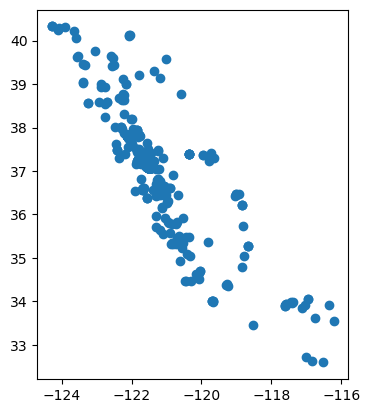

In [13]:
pigs_recent.plot()

###`matplotlib`'s `fig` and `ax`

We use `matplotlib` to create more complex, customized graphs. In particular, maps.

We can interact with `matplotlib` via its `pyplot` interface which we imported as 

```python
import matplotlib.pyplot as plt
```

Matplotlib graphs the data in a **figure** which can have one or more **axes**. 
The axis is *only* the area specified by the x-y axis and what is plotted in it.

To initialize a blank figure:

1. Initialze a blank figure and axes by calling `pyplot`'s `subplots()` function and
2. show the graph using `plt.show()`

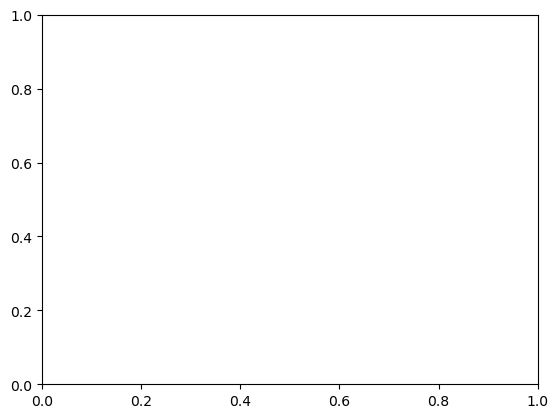

In [14]:
# create a blank figure (fig) and an empty axis (ax)
fig, ax = plt.subplots()

# display figure
plt.show()

## Adding a layer

When using `matplotlib` it can be useful to think of creating a plot as adding layers to an axis.

The general syntax to plot a dataframe `df` onto an axis is:
```python
# create a new figure
fig, ax = plt.subplots()

# plot df on the ax axis
df.plot(ax = ax,
        ...) # other arguments for plot function

# display figure
plt.show()
```

**Example**

The first layer we wnat to add to our axis is the `pigs_recent` point data

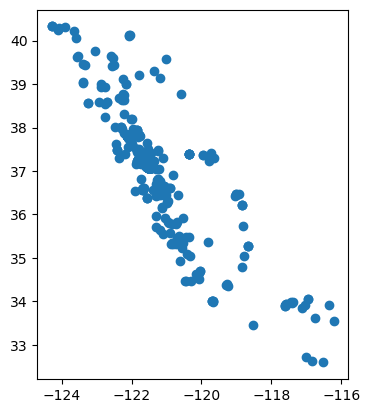

In [15]:
# create a new figure and axis
fig, ax = plt.subplots()

# add pigs point plot to our figure's axis
pigs_recent.plot(ax = ax)

# display figure
plt.show()

### Customization

Matplotlib allows for a lot of customization, Some can be done directly in the `plot()` function (like we did with pandas dataframes), while others are done by updating attributes from the axis `ax`.

Some basic customization of our pigs data:

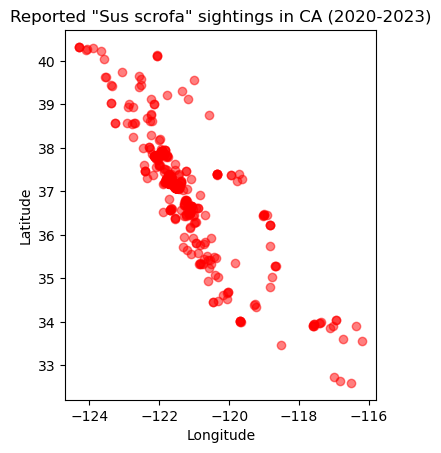

In [17]:
# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
pigs_recent.plot(ax = ax,
                alpha = 0.5,
                color = 'red')

# update axis
# customization seperate from data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel("Longitude")
ax.set_ylabel('Latitude')

# display figure
plt.show()

## Exercise

1. Open the CA boundary shapefile and store as ca_boundary. How many features does it have?
2. Add it to the pig sightings graph so that the CA boundary appears behind the points.

In [29]:
# read in ca boundary data
ca_boundary = gpd.read_file('data/ca-boundary/ca-boundary.shp')

ca_boundary

# one feature!

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


In [32]:
# geom_type will show what kind of vector data is stored in each feature of the geometry column
ca_boundary.geom_type

0    MultiPolygon
dtype: object

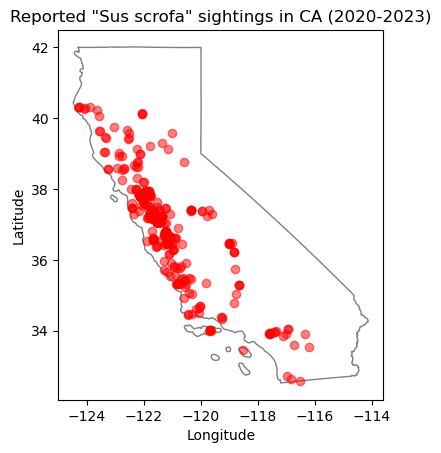

In [33]:
# initialize empty figure
fig, ax = plt.subplots()

# add data layers to axis
ca_boundary.plot(ax=ax,
                color = 'none',
                edgecolor = 'gray')

pigs_recent.plot(ax = ax,
                alpha = 0.5,
                color = 'red')

# update axis
# customization seperate from data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel("Longitude")
ax.set_ylabel('Latitude')

# display figure
plt.show()